In [313]:
import numpy as numpy
import jax
import jax.numpy as jnp
import importlib
import matplotlib.pyplot as plt
import seaborn as sns

import J_sampler
import J_inference
import J_diagnostics

In [314]:
importlib.reload(J_sampler)
importlib.reload(J_inference)
importlib.reload(J_diagnostics)

<module 'J_diagnostics' from '/Users/lucaraffo/Desktop/CFM_2025/codes_final/J_diagnostics.py'>

we fix the number of spins to 10, and we generate a sprase precision matrix.

In [286]:
n_spins = 10

In [236]:
seed = 0
key = jax.random.PRNGKey(seed)
h = jax.random.uniform(key, shape=(n_spins,), minval=-1.0, maxval=1.0)

In [237]:
J = J_sampler.J_maker(n_spins, p = 0.2, seed = 0)

<Axes: >

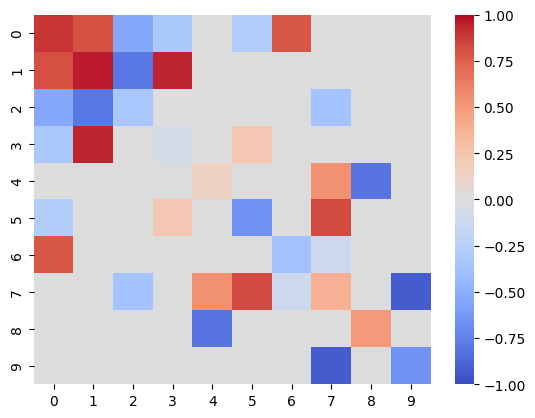

In [238]:
sns.heatmap(J + jnp.diag(h), vmin = -1.0, vmax = 1.0, cmap = "coolwarm")

generate some samples from this boltzmann measure

In [239]:
n_samples = 400
samples = J_sampler.J_sampler(n_samples, J, h, seed = 10)
samples_out = J_sampler.J_sampler(n_samples, J, h, seed = 1)

we plot below the results of our inference methods.

RPLE

MPF

RM

EMHT

In [240]:
histogram = J_sampler._samples_to_histogram(samples)

In [241]:
J_rple, history_rple = J_inference.inverse_ising("RPLE", 0.1, "Y", samples, samples_out, record_history = True)
h_rple = jnp.diag(J_rple)

λ = 0.013785  (reg = 0.1)
Selecting best snapshot by out-of-sample log-pseudolikelihood...
  -> selected snapshot at step 470 


<Axes: >

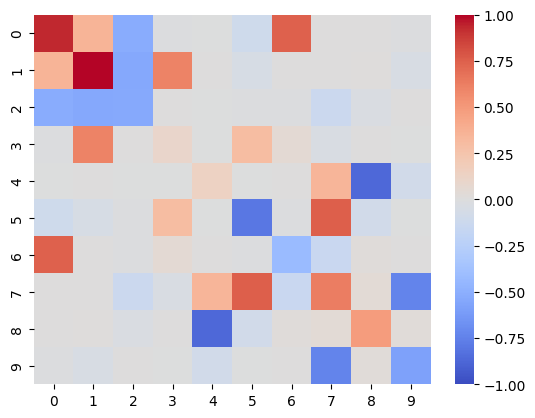

In [179]:
sns.heatmap(J_rple, vmin = -1.0, vmax = 1.0, cmap = "coolwarm")

In [180]:
J_mpf, history_mpf = J_inference.inverse_ising("MPF", 0.1, "Y", samples, samples_out, record_history = True)
h_mpf = jnp.diag(J_mpf)

λ = 0.013785  (reg = 0.1)
Selecting best snapshot by out-of-sample log-pseudolikelihood...
  -> selected snapshot at step 327 


<Axes: >

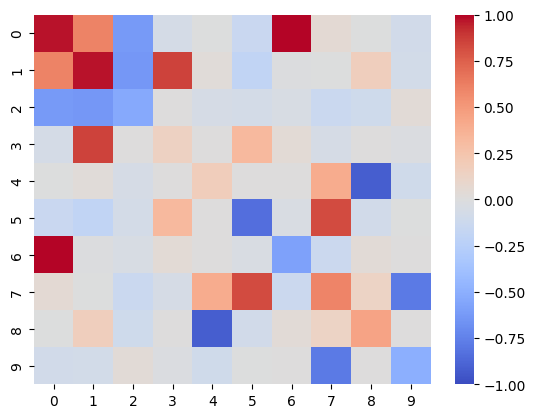

In [181]:
sns.heatmap(J_mpf, vmin = -1.0, vmax = 1.0, cmap = "coolwarm")

In [182]:
J_rm, history_rm = J_inference.inverse_ising("RM", 0.1, "Y", samples, samples_out, record_history = True)
h_rm = jnp.diag(J_rm)

λ = 0.013785  (reg = 0.1)
Selecting best snapshot by out-of-sample log-pseudolikelihood...
  -> selected snapshot at step 371 


<Axes: >

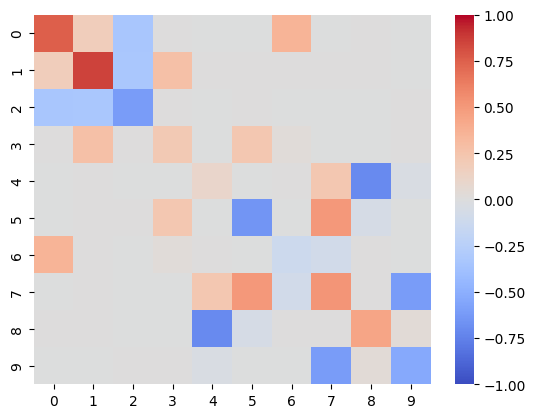

In [183]:
sns.heatmap(J_rm, vmin = -1.0, vmax = 1.0, cmap = "coolwarm")

In [184]:
J_emht, history_emht = J_inference.inverse_ising("EMHT", 0.1, "Y", samples, samples_out, record_history = True)
h_emht = jnp.diag(J_emht)

λ = 0.013785  (reg = 0.1)
Selecting best snapshot by out-of-sample log-pseudolikelihood...
  -> selected snapshot at step 152 


<Axes: >

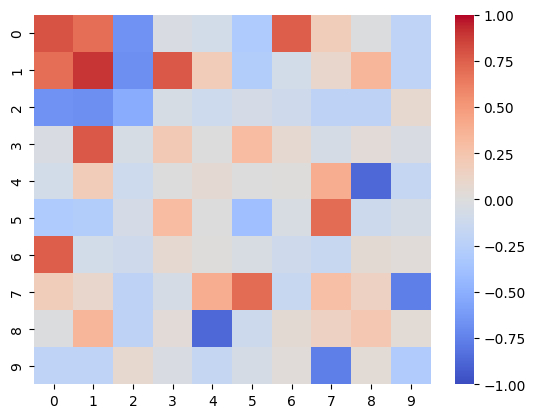

In [185]:
sns.heatmap(J_emht, vmin = -1.0, vmax = 1.0, cmap = "coolwarm")

In [327]:
J_mpf_masked = J_diagnostics.mask(J_mpf, 1e-3)

<Axes: >

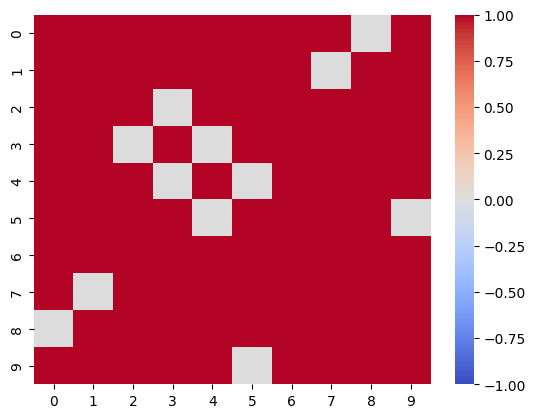

In [328]:
sns.heatmap(J_mpf_masked, vmin = -1.0, vmax = 1.0, cmap = "coolwarm")

In [315]:
J_mpf_l0, bic, score, maskedss = J_diagnostics.bic_procedure(samples, samples_out, J_mpf, "MPF", "Y")

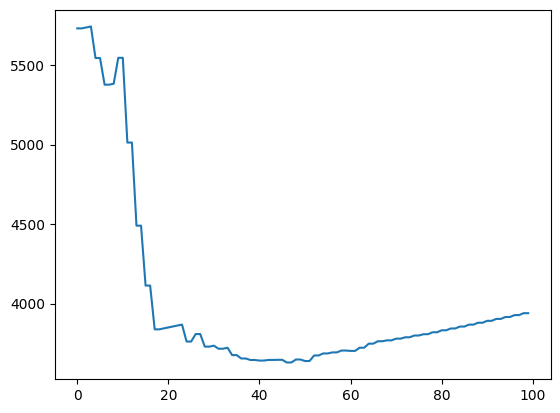

In [330]:
plt.plot(bic)

<Axes: >

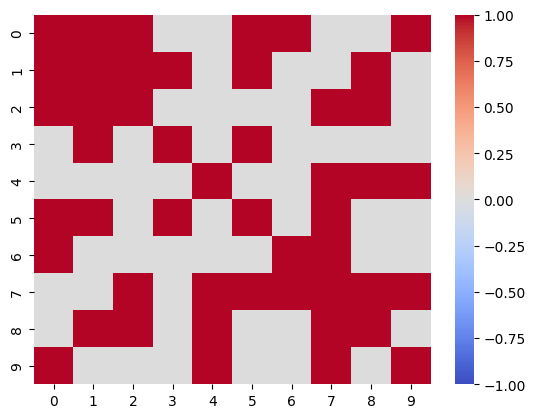

In [329]:
sns.heatmap(J_diagnostics.mask(J_mpf_l0, 1e-3), vmin = -1.0, vmax = 1.0, cmap = "coolwarm")

In [333]:
J_mpf_refit, history_mpf_refit = J_inference.inverse_ising("MPF", 0.0, "Y", samples, samples_out, adj = J_diagnostics.mask(J_mpf_l0, 1e-3), record_history = True)

λ = 0  (reg = 0.0)
Selecting best snapshot by out-of-sample log-pseudolikelihood...
  -> selected snapshot at step 170 


<Axes: >

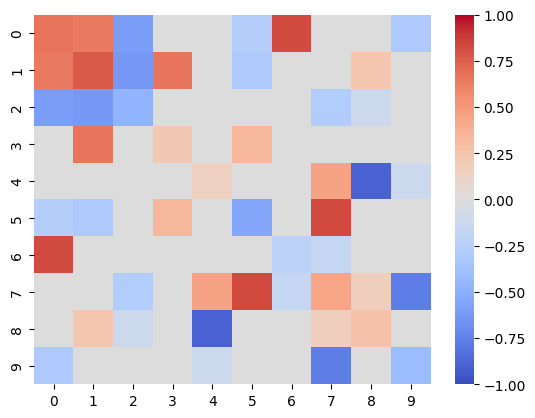

In [334]:
sns.heatmap(J_mpf_refit, vmin = -1.0, vmax = 1.0, cmap = "coolwarm")